# Binary Classification Model for Interview

*Dustin Bracy, Paul Huggins, Grace Lang & Branum Stephens* 

## Analysis Objective: 
The purpose of this analysis is to build and tune a model best fit for classifying a binary field of 'y'. During an interview set by the hiring manager we were given autonomized data that will be used in the analysis. The data fields and descriptions are unknown, so we will rely on our modeling techniques and evaluation to determine the best fit model for a classification prediction. 

## Reading in the data: 

In [75]:
#Grace cant get all of these packages to load properly 
import json
import requests
from datetime import timezone

In [76]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns

In [77]:
#I could not push this file to git. So you'll have to download yourself and save within your local repository
#data sourced: https://smu.box.com/s/k9x192jxm39enjw2wx8ouw2kopx33l32

df = pd.read_csv("../Unit14_CaseStudy/final_project.csv")

## EDA of dataset: 

In [16]:
#Running Pandas Profile Report
profile = ProfileReport(df, title='Pandas Profiling Report')

In [17]:
#profile.to_widgets()

In [78]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [79]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,...,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,...,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,...,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [81]:
df.isna().sum()

x0     26
x1     25
x2     38
x3     37
x4     26
x5     37
x6     26
x7     27
x8     21
x9     30
x10    43
x11    30
x12    36
x13    31
x14    34
x15    35
x16    26
x17    27
x18    40
x19    35
x20    38
x21    29
x22    27
x23    47
x24    28
x25    22
x26    36
x27    30
x28    35
x29    30
x30    30
x31    39
x32    31
x33    41
x34    41
x35    30
x36    27
x37    23
x38    31
x39    23
x40    36
x41    40
x42    26
x43    37
x44    40
x45    29
x46    31
x47    37
x48    32
x49    32
y       0
dtype: int64

In [82]:
[x for x in df if type(df[x][0]) != np.float64]

['x24', 'x29', 'x30', 'x32', 'x37', 'y']

In [83]:
[print(x,type(x)) for x in df if type(df[x][0]) != np.float64]

x24 <class 'str'>
x29 <class 'str'>
x30 <class 'str'>
x32 <class 'str'>
x37 <class 'str'>
y <class 'str'>


[None, None, None, None, None, None]

In [84]:
cat_vars = [col for col in df if type(df[col][0]) != np.float64]

df[cat_vars]

,x24,x29,x30,x32,x37,y
0,euorpe,July,tuesday,0.0%,$1313.96,0
1,asia,Aug,wednesday,-0.02%,$1962.78,0
2,asia,July,wednesday,-0.01%,$430.47,0
3,asia,July,wednesday,0.01%,$-2366.29,0
4,asia,July,tuesday,0.01%,$-620.66,1
...,...,...,...,...,...,...
159995,asia,Aug,wednesday,0.0%,$-891.96,1
159996,asia,May,wednesday,-0.01%,$1588.65,0
159997,asia,Jun,wednesday,-0.0%,$687.46,1
159998,asia,May,wednesday,-0.02%,$439.21,0


In [85]:
month_fix = {
    'July':7, 
    'Aug':8, 
    'Jun':6, 
    'May':5, 
    'sept.':9, 
    'Apr':4, 
    'Nov':11, 
    'Oct':10, 
    'Mar':3,
    'Feb':2, 
    'Dev':12, 
    'January':1
}

week_fix = {'tuesday':2, 'wednesday':3, 'thurday':4, 'monday':1, 'friday':5}

df['x29'] = df['x29'].apply(lambda x: month_fix.get(x))
df['x30'] = df['x30'].apply(lambda x: week_fix.get(x))

In [86]:
def strip_special(x):
    if type(x) != str:
        return x
    clean = x.strip('$')
    if clean.endswith('%'):
        clean = x.strip('%')
        clean = np.float64(clean) * .01
    return np.float64(clean)

In [87]:
df['x32'] = df['x32'].apply(strip_special)
df['x37'] = df['x37'].apply(strip_special)

## Data Preprocessing

In [105]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score,\
    recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from scipy.sparse import csc_matrix

df.dropna(inplace=True)
X = df.drop(columns=['y'])
y = df['y']
assert len(X) == len(y), 'X/Y are different lengths'

skf = StratifiedKFold(n_splits=3)
skf.get_n_splits(X, y)
split_results = {}
X = pd.get_dummies(X, columns=['x24'])
M = csc_matrix(X)
L = y


## Get Feature Importance

In [106]:
def get_FI(model:str):
    """Returns a sorted dataframe of feature importance coefficients.
    Arguments:
        model: LogisticRegression or RandomForest
    """
    clfs = {'LogisticRegression':LogisticRegression(), 'RandomForest':RandomForestClassifier()}
    for split_id, (train_index, test_index) in enumerate(skf.split(M, L)):
        clf = clfs.get(model)

        try:  # always set random and all processors, w/o confounding param_grid
            clf.set_params(random_state=86)
            clf.set_params(n_jobs=4)
        except:
            pass
        
        clf.fit(M[train_index],L.iloc[train_index])

        preds = clf.predict(M[test_index])
        split_results[split_id] = {
            'train_index': train_index,
            'test_index': test_index,
            'split_accuracy': accuracy_score(L.iloc[test_index], preds),
            'split_precision': precision_score(L.iloc[test_index], preds),
            'split_recall': recall_score(L.iloc[test_index], preds),
            'split_f1_score': f1_score(L.iloc[test_index], preds),
            'split_auc': roc_auc_score(L.iloc[test_index], preds)
            }

    def split_avg(metric, split_results):
        metrics = [split_results[id][metric] for id in split_results]
        return np.mean(metrics)

    final_results = {
        'clf': clf,
        #'splits': split_results,
        'accuracy': split_avg('split_accuracy', split_results),
        'precision': split_avg('split_precision', split_results),
        'recall': split_avg('split_recall', split_results),
        'f1_score': split_avg('split_f1_score', split_results),
        'auc': split_avg('split_auc', split_results)
        }

    print(final_results)
    if model == "RandomForest":
        coefs = final_results['clf'].feature_importances_
    if model == "LogisticRegression":
        coefs = list(final_results['clf'].coef_[0])
    labels = list(X)

    FI = pd.DataFrame(zip(labels,coefs), 
    columns=['Feature','Feature_Importance']).sort_values(
        by='Feature_Importance', ascending=False)

    return FI

In [107]:
get_FI('RandomForest')

{'clf': RandomForestClassifier(n_jobs=4, random_state=86), 'accuracy': 0.9217700437474637, 'precision': 0.9306481400883589, 'recall': 0.8698265823183206, 'f1_score': 0.8992100558230268, 'auc': 0.9131991473454096}


,Feature,Feature_Importance
23,x23,0.073153
20,x20,0.059892
47,x48,0.059282
48,x49,0.059024
41,x42,0.050966
27,x28,0.047975
12,x12,0.047926
26,x27,0.047187
36,x37,0.044394
39,x40,0.042402


In [ ]:
get_FI('LogisticRegression')

**Review correlations between variables:**

There are strong positive correlations between X2 & X6 as well as X38 & X41. Y shows some stronger negative correlations with X20 & X23. 

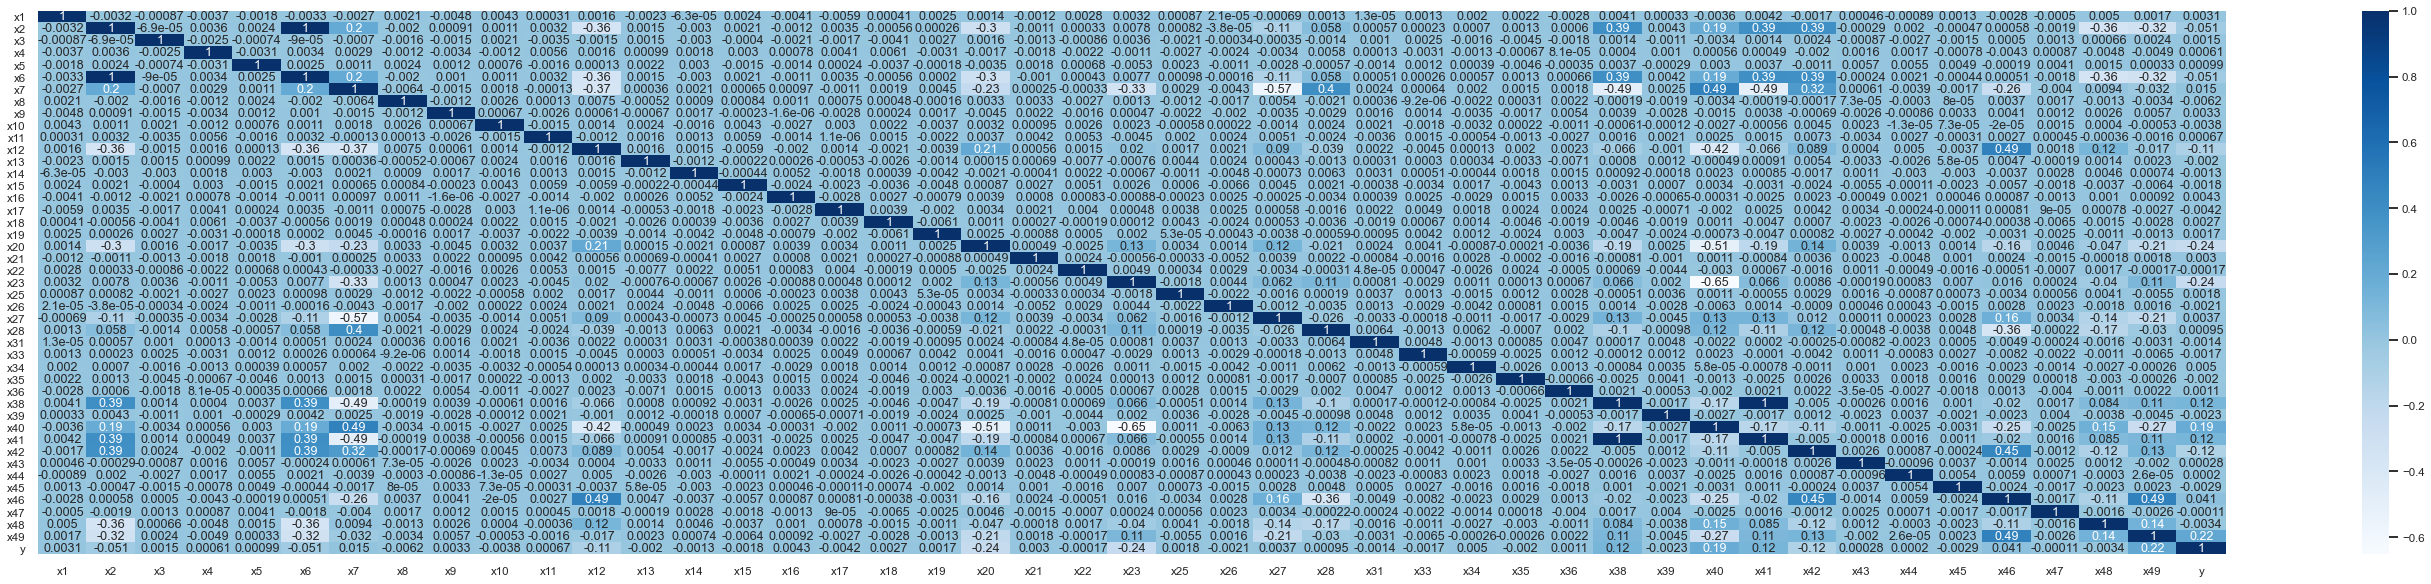

In [21]:
sns.set(rc={'figure.figsize':(49,10)})
sns.set_context("talk", font_scale=0.7)
    
sns.heatmap(df.iloc[:,1:].corr(), cmap='Blues', annot=True);

**Attribute Analysis:**

The following graphs will show some descriptive statistics of the relationship between positive Y (1) and some of the other variables within the dataset. 

Text(0.5, 1.0, 'Number of Postive vs Negative Ys')

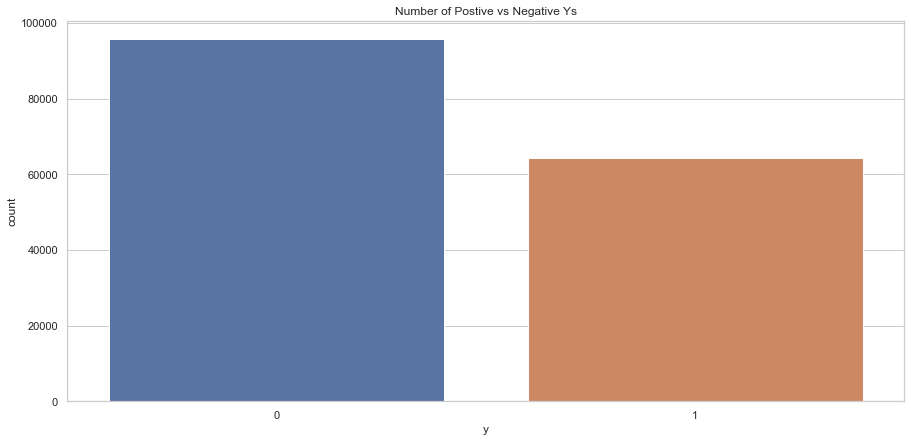

In [23]:
sns.set(rc={'figure.figsize':(15,7)})
sns.set_style('whitegrid')
fig = sns.countplot(x = 'y', data = df)
fig.set_title("Number of Postive vs Negative Ys")

In [2]:
#pip install fastapi
#pip install uvicorn[standard]
from typing import Optional
from fastapi import FastAPI

In [3]:
#Trying to use this code from a setup training sheet
app = FastAPI()

@app.get("/")
def read_root():
    return {"Hello": "World"}


@app.get("/items/{item_id}")
def read_item(item_id: int, q: Optional[str] = None):
    return {"item_id": item_id, "q": q}